In [7]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

# import cross validation and other evaluation tool 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Evaulation tools
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
# set display options
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [8]:
# load dataset
data = pd.read_csv("Hotel_Bookings_Prepared.csv", index_col = "Unnamed: 0")

In [9]:
# feature selection
features = ['lead_time',
            'stays_in_weekend_nights',
            'stays_in_week_nights',
            'adults',
            'children',
            'babies',
            'is_repeated_guest',
            'previous_cancellations',
            'previous_bookings_not_canceled',
            'booking_changes',
            'days_in_waiting_list',
            'adr',
            'required_car_parking_spaces',
            'total_of_special_requests',
            'is_company',
            'is_agent',
            'is_diff_room_type',
            'is_holiday',
            'hotel_City Hotel',
            'hotel_Resort Hotel',
            'arrival_date_month_April',
            'arrival_date_month_August',
            'arrival_date_month_December',
            'arrival_date_month_February',
            'arrival_date_month_January',
            'arrival_date_month_July',
            'arrival_date_month_June',
            'arrival_date_month_March',
            'arrival_date_month_May',
            'arrival_date_month_November',
            'arrival_date_month_October',
            'arrival_date_month_September',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'deposit_type_Refundable',
            'arrival_date_day_of_the_week_Friday',
            'arrival_date_day_of_the_week_Monday',
            'arrival_date_day_of_the_week_Saturday',
            'arrival_date_day_of_the_week_Sunday',
            'arrival_date_day_of_the_week_Thursday',
            'arrival_date_day_of_the_week_Tuesday',
            'arrival_date_day_of_the_week_Wednesday',
            'continent_Africa',
            'continent_Antarctica',
            'continent_Asia',
            'continent_Australia',
            'continent_Europe',
            'continent_North America',
            'continent_South America']

In [10]:
# define model features and label
X = data[features]
# change target column to array
y = data['is_canceled'].values.ravel()

In [11]:
# Split data - 40% for testing, 60% for training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [16]:
# tuning 
## use GridSearchCV

try_grid = {
            'penalty':['l1', 'l2', 'elasticnet'],
            'dual':[False],
            'tol':[1e-4],
            'C':[0.8,1.0,1.2,1.4,1.6,2.0],
            'fit_intercept':[True],
            'intercept_scaling':[1],
            'class_weight':[None],
            'random_state':[None],
            'solver':['saga'],
            'max_iter':[4000],
            'multi_class':['ovr'],
            'verbose':[0],
            'warm_start':[False],
            'l1_ratio':[0.5]
           }
LRM = GridSearchCV(LogisticRegression(), try_grid, cv=10,n_jobs=-1 )

In [17]:
# Fit to training dataset
LRM.fit(X_train,y_train)

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.8, 1.0, 1.2, 1.4, 1.6, 2.0],
                         'class_weight': [None], 'dual': [False],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'l1_ratio': [0.5], 'max_iter': [4000],
                         'multi_class': ['ovr'],
                         'penalty': 

In [18]:
# See the best score and the best parameters
print(LRM.best_score_)
print(LRM.best_params_)

0.81433376415638
{'C': 2.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 4000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [19]:
# Define the model with best parameters

## Please help fill in the best params after the results are out
LRM = LogisticRegression()

In [25]:
# Get average acuracy rate of the model performacne on traingin dataset
score_cv = cross_val_score(LRM, X_train, y_train, cv=10)
score_cv.mean()

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.8039616038216117

In [26]:
# LRM - fit model
LRM.fit(X_train,y_train)

/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# LRM - show coefficient of the features
LRM_coefficient = pd.DataFrame(LRM.coef_.flatten(), X_train.columns, columns=['Coefficient'])  
#LRM_coefficient.loc[LRM1_coefficient['Coefficient'] != 0]
LRM_coefficient.iloc[LRM_coefficient['Coefficient'].abs().argsort()][::-1].head(15)

,Coefficient
required_car_parking_spaces,-20.330921
previous_cancellations,12.612188
booking_changes,-7.507949
adr,3.461850
deposit_type_Non Refund,3.173401
lead_time,2.858552
previous_bookings_not_canceled,-2.809666
adults,2.752787
stays_in_week_nights,2.200817
deposit_type_No Deposit,-2.116780


In [28]:
# LRM - predict labels in testing set
# y_pred = predicted labels from testing set features (X_test)
y_pred = LRM.predict(X_test)

In [29]:
# LRM1 - predict probability in testing set
# y_pred_prob = the probabilistic predictions
y_pred_prob = LRM.predict_proba(X_test)

In [30]:
# Evaluation Tools LGM1
print('LGM')
print("Accuracy: \n",accuracy_score(y_test,y_pred,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

# introduce majority classifier as the benchmark model ( is the testing record count)
pred_val_maj = np.zeros(y_test.shape, dtype = int)
# Evaluation Tools Majority Classifier
print("Accuracy: \n",accuracy_score(y_test,pred_val_maj,normalize=True,sample_weight=None))
print("Classification Report: \n",classification_report(y_test,pred_val_maj))
print("Confusion Matrix: \n",confusion_matrix(y_test,pred_val_maj))

LGM
Accuracy: 
 0.8045271798308066
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     30163
           1       0.82      0.61      0.70     17593

    accuracy                           0.80     47756
   macro avg       0.81      0.76      0.78     47756
weighted avg       0.81      0.80      0.80     47756

Confusion Matrix: 
 [[27773  2390]
 [ 6945 10648]]
Accuracy: 
 0.6316064997068431
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     30163
           1       0.00      0.00      0.00     17593

    accuracy                           0.63     47756
   macro avg       0.32      0.50      0.39     47756
weighted avg       0.40      0.63      0.49     47756

Confusion Matrix: 
 [[30163     0]
 [17593     0]]


/home/eason/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


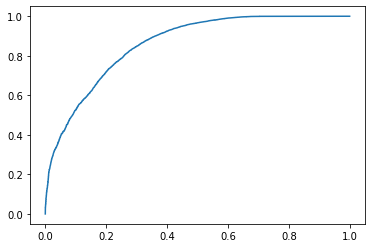

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob[:,0],pos_label=0)
# LRM - AUC 
metrics.auc(fpr, tpr)
# ROC
plt.plot(fpr,tpr)

In [32]:
# finding PR-AUC


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob[:,0])
# calculate the precision-recall auc
auc_score = auc(recall, precision)
print(f'AUC: {auc_score}')


AUC: 0.2260569835374682
